   # Creep Data Analysis 

## Importing creep data as comma separated value(csv) file

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
import numpy as np
import pandas as pd
creep=pd.read_csv('creepdata.csv')

In [34]:
# print the creep data
creep

,Temperature,Load,Time Period(Hour),Time Period(Year),CEEQ,Category
0,500,110,0.00,0.000000,0.000000e+00,A
1,500,110,0.05,0.000006,0.000000e+00,A
2,500,110,0.10,0.000011,1.460000e-05,A
3,500,110,0.15,0.000017,2.922200e-05,A
4,500,110,0.20,0.000023,4.380000e-05,A
5,500,110,0.30,0.000034,7.300000e-05,A
6,500,110,0.50,0.000057,1.314700e-04,A
7,500,110,0.90,0.000103,2.482770e-04,A
8,500,110,1.70,0.000194,4.817410e-04,A
9,500,110,3.30,0.000377,9.480650e-04,A


# Analysing the Data Set 

### *The creep data set has 1240 rows and 6 columns*

In [35]:
creep.shape

(1240, 6)

In [36]:
creep.columns

Index(['Temperature', 'Load', 'Time Period(Hour)', 'Time Period(Year)', 'CEEQ',
       'Category'],
      dtype='object')

In [37]:
# check the types of data stored under each column
creep.dtypes

Temperature            int64
Load                   int64
Time Period(Hour)    float64
Time Period(Year)    float64
CEEQ                 float64
Category              object
dtype: object

### Simulations were run for 5 different temperatures in degree celsius

In [38]:
print(creep.Temperature.unique())

[500 400 300 200 100]


In [39]:
print(creep.Temperature.value_counts())

500    266
400    251
300    251
200    250
100    222
Name: Temperature, dtype: int64


### Simulations were run for 7 different load in MPa 

In [40]:
print(creep.Load.unique())

[110 100  90  80  70  60  50]


In [41]:
print(creep.Load.value_counts())

110    249
100    222
90     198
80     172
70     152
60     139
50     108
Name: Load, dtype: int64


### *There is no missing  values in the data set*

In [42]:
creep.isnull().sum()

Temperature          0
Load                 0
Time Period(Hour)    0
Time Period(Year)    0
CEEQ                 0
Category             0
dtype: int64

In [43]:
creep.Category.describe()

count     1240
unique       6
top          A
freq       912
Name: Category, dtype: object

The highest simulated creep value is 1.21 mm for the node shows the maximum creep value at a temperature of 500 degree Celcius, 110 MPa load when the simulation was run for 262800 hours.   

The whole data set is divided into 6 categories according to creep values. 
CEEQ(mm) Category
0.0-.2        A
.2-.4         B
.4-.6         C
.6-.8         D
.8-1.0        E
>1.0          F

In [44]:
# the number of CEEQ value in each category
creep.Category.value_counts()

A    912
B    136
C     96
D     58
E     32
F      6
Name: Category, dtype: int64

In [45]:
# let's sort the data set according to CEEQ value descending
creep.sort_values('CEEQ', ascending=False).head(20)

,Temperature,Load,Time Period(Hour),Time Period(Year),CEEQ,Category
52,500,110,262800.0,30.000000,1.210420,F
51,500,110,246570.0,28.147260,1.191960,F
50,500,110,214567.0,24.493950,1.153700,F
49,500,110,182565.0,20.840753,1.111160,F
48,500,110,150562.0,17.187443,1.063000,F
47,500,110,127900.0,14.600457,1.023460,F
314,400,110,262800.0,30.000000,0.995481,E
46,500,110,112793.0,12.875913,0.993444,E
565,300,110,262800.0,30.000000,0.977253,E
313,400,110,239107.0,27.295320,0.973326,E


### *Let's see how many CEEQ has their values greater than 1mm*

In [46]:
severe_creep=creep[(creep.CEEQ)>1]
print(severe_creep)

    Temperature  Load  Time Period(Hour)  Time Period(Year)     CEEQ Category
47          500   110           127900.0          14.600457  1.02346        F
48          500   110           150562.0          17.187443  1.06300        F
49          500   110           182565.0          20.840753  1.11116        F
50          500   110           214567.0          24.493950  1.15370        F
51          500   110           246570.0          28.147260  1.19196        F
52          500   110           262800.0          30.000000  1.21042        F


### *So there are six values and let's put them into a graph to see the relation with increasing time period*

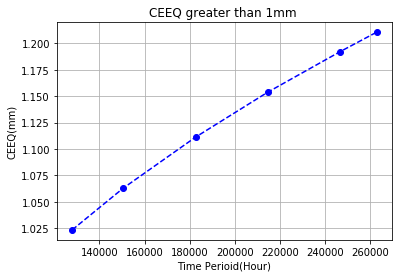

In [47]:
import matplotlib.pyplot as plt
a=severe_creep['Time Period(Hour)']
b=severe_creep['CEEQ']
plt.plot(a,b, color='b', linestyle='--', marker='o')
plt.xlabel('Time Perioid(Hour)')
plt.ylabel('CEEQ(mm)')
plt.title('CEEQ greater than 1mm ')
plt.grid('True')


### *We can filter data by multiple criteria. For example, here we see CEEQ values greater than .8mm at 400 degree Celcius*

In [48]:
creep[(creep.CEEQ>.8)&(creep.Temperature==400)]

,Temperature,Load,Time Period(Hour),Time Period(Year),CEEQ,Category
309,400,110,121484.0,13.868037,0.830312,E
310,400,110,147623.0,16.851941,0.869283,E
311,400,110,173761.0,19.835731,0.903361,E
312,400,110,199899.0,22.819521,0.933747,E
313,400,110,239107.0,27.295320,0.973326,E
314,400,110,262800.0,30.000000,0.995481,E


# Effects of load and temperature on creep strain  

In [66]:
d = {'110 MPa' : pd.Series([0.9255,0.9413,0.977,0.9955,1.21], index=['100','200','300','400','500']),
     '100 MPa' : pd.Series([0.6657,0.675,0.7019,0.7146,0.8843],index=['100','200','300','400','500']),
     '90 MPa' : pd.Series([0.4516,0.4582,0.4735,0.4811,0.6176],index=['100','200','300','400','500']),
     '80 MPa' : pd.Series([0.2682,0.271,0.2785,0.2869,0.3912],index=['100','200','300','400','500']),
     '70 MPa' : pd.Series([0.1217,0.1222,0.1241,0.1247,0.2023],index=['100','200','300','400','500']),
     '60 MPa' : pd.Series([0.0054,0.0349,0.035,0.0348,0.0719],index=['100','200','300','400','500']),
     '50 MPa' : pd.Series([1.50E-07,0.0053,0.0057,0.0052,0.0146],index=['100','200','300','400','500'])}
df=pd.DataFrame(d)
df

,110 MPa,100 MPa,90 MPa,80 MPa,70 MPa,60 MPa,50 MPa
100,0.9255,0.6657,0.4516,0.2682,0.1217,0.0054,1.500000e-07
200,0.9413,0.6750,0.4582,0.2710,0.1222,0.0349,5.300000e-03
300,0.9770,0.7019,0.4735,0.2785,0.1241,0.0350,5.700000e-03
400,0.9955,0.7146,0.4811,0.2869,0.1247,0.0348,5.200000e-03
500,1.2100,0.8843,0.6176,0.3912,0.2023,0.0719,1.460000e-02


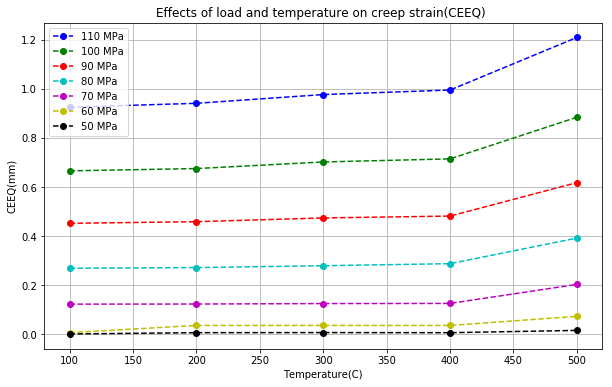

In [96]:
Temperature=[100,200,300,400,500]
b=df['110 MPa']
c=df['100 MPa']
d=df['90 MPa']
e=df['80 MPa']
f=df['70 MPa']
g=df['60 MPa']
h=df['50 MPa']
plt.plot(Temperature,b, color='b', linestyle='--', marker='o',label='110 MPa')
plt.plot(Temperature,c, color='g', linestyle='--', marker='o')
plt.plot(Temperature,d, color='r', linestyle='--', marker='o')
plt.plot(Temperature,e, color='c', linestyle='--', marker='o')
plt.plot(Temperature,f, color='m', linestyle='--', marker='o')
plt.plot(Temperature,g, color='y', linestyle='--', marker='o')
plt.plot(Temperature,h, color='k', linestyle='--', marker='o')
plt.grid('True')
plt.xlabel('Temperature(C)')
plt.ylabel('CEEQ(mm)')
plt.title('Effects of load and temperature on creep strain(CEEQ) ')
plt.legend()
plt.rcParams['figure.figsize']=(8,6)

# Cross Validation: Parameter Tuning

## Loading the data

In [98]:
feature=creep[['Temperature','Load','Time Period(Hour)']]
feature.head()

,Temperature,Load,Time Period(Hour)
0,500,110,0.00
1,500,110,0.05
2,500,110,0.10
3,500,110,0.15
4,500,110,0.20


In [99]:
target=creep['Category'].map({'A':0,'B':1,'C':2, 'D':3,'E':4,'F':5})
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [100]:
# store feature matrix in "X"
X=feature
# store response vector in "y"
y=target

In [101]:
feature.dtypes

Temperature            int64
Load                   int64
Time Period(Hour)    float64
dtype: object

In [102]:
target.dtypes

dtype('int64')

###  Select the best tuning parameters (aka "hyperparameters") for KNN on the creep dataset

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [104]:
k_range=list(range(1,31))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores) 

[0.8143923822284712, 0.8063742590840283, 0.7949414677182423, 0.7763450459628735, 0.7706576835394561, 0.7674263628576032, 0.7641996170205049, 0.7560944822149229, 0.7479380038340622, 0.7462851112720787, 0.7430454674536772, 0.7325132360487184, 0.7332935639175708, 0.7228517207940798, 0.7204781670750715, 0.7196575450694324, 0.7261162619067684, 0.7237301097625632, 0.724482741919826, 0.7261691544687519, 0.7270291207366861, 0.7301384328991121, 0.7236726423558253, 0.7277774776053008, 0.7390629402797351, 0.7350109975922432, 0.733404223442399, 0.7390503418545382, 0.7398445175791856, 0.7422183708543004]


In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cross-validated accuracy')

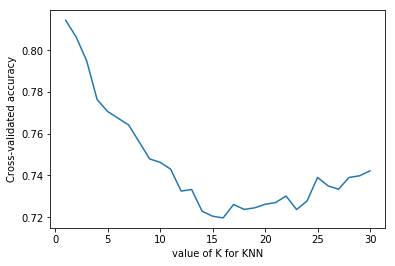

In [106]:
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# Model selection


###  Compare the best KNN model with logistic regression on the iris dataset

In [107]:
# 10-fold cross-validation with the best KNN model
knn=KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.8143923822284712


In [108]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.7194758698381779


# Training a machine learning model with scikit-learn

## K-nearest neighbors (KNN) classification

In [109]:
knn=KNeighborsClassifier(n_neighbors=1)
print(knn)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Predicting some creep strain values as output of given Temperature(C), Load(MPa) and Time Period(Hour)

In [115]:
print(knn.predict([[500,110,262800]]))
print(knn.predict([[500,100,262800]]))
print(knn.predict([[500,90,262800]]))
print(knn.predict([[500,80,262800]]))
print(knn.predict([[500,70,262800]]))
print(knn.predict([[500,60,262800]]))
print(knn.predict([[500,50,262800]]))

[5]
[4]
[3]
[1]
[1]
[0]
[0]


In [116]:
print(knn.predict([[400,110,262800]]))
print(knn.predict([[400,100,262800]]))
print(knn.predict([[400,90,262800]]))
print(knn.predict([[400,80,262800]]))
print(knn.predict([[400,70,262800]]))
print(knn.predict([[400,60,262800]]))
print(knn.predict([[400,50,262800]]))

[4]
[3]
[2]
[1]
[0]
[0]
[0]


### Comparing the simulated values with the knn predicted values

In [111]:
d = {'110 MPa' : pd.Series([1.21,'F',5,5], index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '100 MPa' : pd.Series([.8843,'E',4,4],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '90 MPa' : pd.Series([.6176,'D',3,3],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '80 MPa' : pd.Series([.3912,'B',1,1],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '70 MPa' : pd.Series([.2023,'B',1,1],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '60 MPa' : pd.Series([.0719,'A',0,0],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values']),
     '50 MPa' : pd.Series([.0146,'A',0,0],index=['CEEQ(mm)','Category','Assinged Values','Predicted knn values'])}
df=pd.DataFrame(d)
df

,110 MPa,100 MPa,90 MPa,80 MPa,70 MPa,60 MPa,50 MPa
CEEQ(mm),1.21,0.8843,0.6176,0.3912,0.2023,0.0719,0.0146
Category,F,E,D,B,B,A,A
Assinged Values,5,4,3,1,1,0,0
Predicted knn values,5,4,3,1,1,0,0
